# Monte Carlo Simulation and Efficient Frontier
- Introduction to Monte Carlo Simulation
- Applying Monte Carlo Simulation on portfolios using Sharpe Ratio (from last lesson)
- Creating Efficient Frontier based on Sharpe Ratio

### Resources
- Monte Carlo Simulation https://en.wikipedia.org/wiki/Monte_Carlo_method

### Introduction to Monte Carlo Simulation

In [1]:
import numpy as np

In [4]:
def roll_dice():
    return np.sum(np.random.randint(1, 7, 2))

In [11]:
roll_dice()

6

In [12]:
def monte_carlo_simulation(runs=1000):
    results = np.zeros(2)
    for _ in range(runs):
        if roll_dice() == 7:
            results[0] += 1
        else:
            results[1] += 1
    return results

In [13]:
monte_carlo_simulation()

array([176., 824.])

In [14]:
np.zeros(2)

array([0., 0.])

In [15]:
176*5

880

In [16]:
monte_carlo_simulation()

array([171., 829.])

In [17]:
171*5

855

In [19]:
results = np.zeros(1000)

for i in range(1000):
    results[i] = monte_carlo_simulation()[0]

In [21]:
import matplotlib.pyplot as plt
%matplotlib notebook

<IPython.core.display.Javascript object>


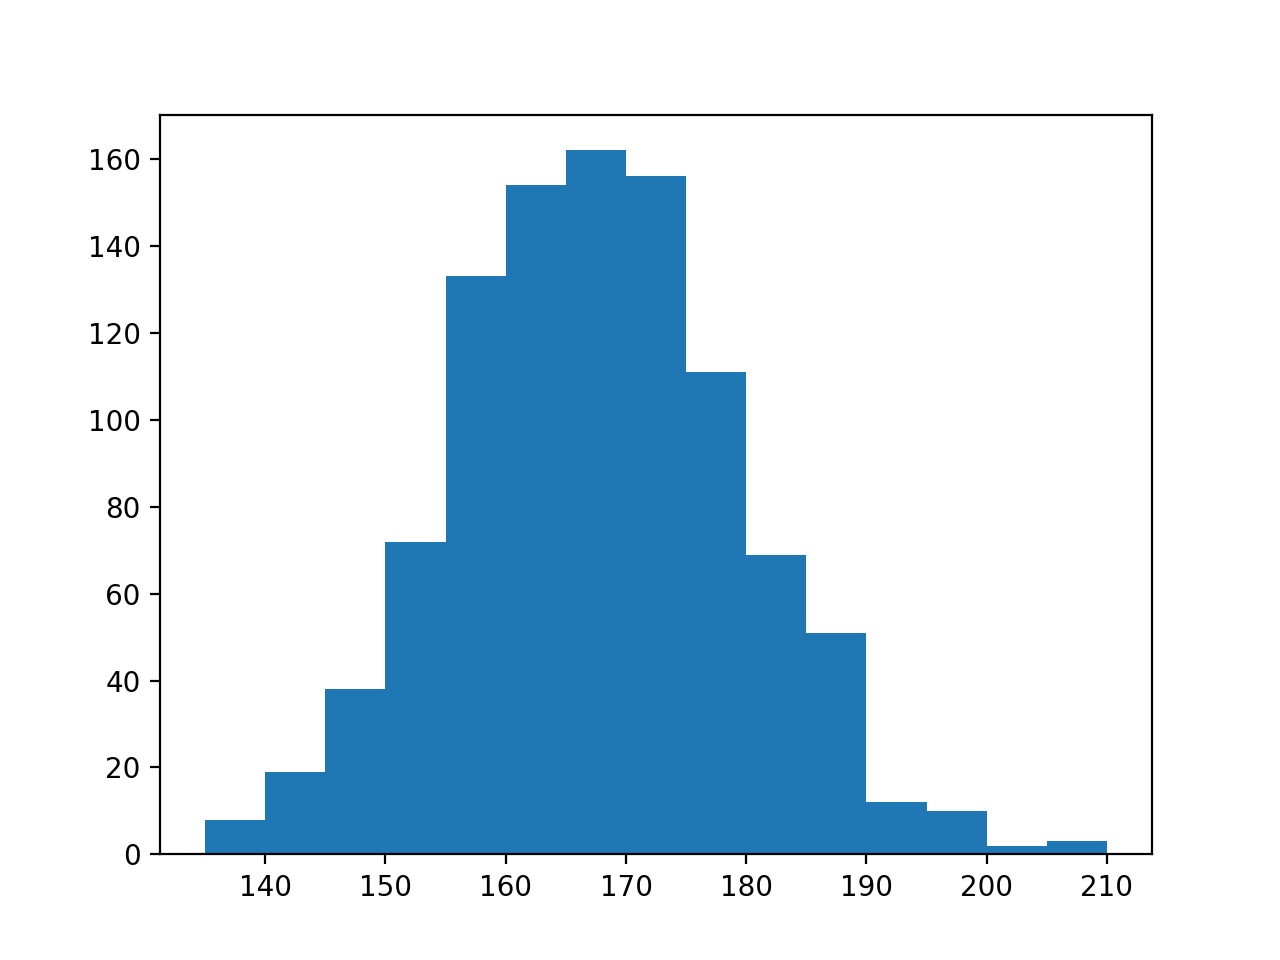

(array([  8.,  19.,  38.,  72., 133., 154., 162., 156., 111.,  69.,  51.,
         12.,  10.,   2.,   3.]),
 array([135., 140., 145., 150., 155., 160., 165., 170., 175., 180., 185.,
        190., 195., 200., 205., 210.]),
 <BarContainer object of 15 artists>)

In [22]:
fig, ax = plt.subplots()
ax.hist(results, bins=15)

In [24]:
results.mean()*5

835.7349999999999

In [25]:
1000 - results.mean()

832.8530000000001

In [26]:
results.mean()/1000

0.167147

In [29]:
d1 = np.arange(1, 7)
d2 = np.arange(1, 7)

In [31]:
mat = np.add.outer(d1, d2)

In [32]:
mat

array([[ 2,  3,  4,  5,  6,  7],
       [ 3,  4,  5,  6,  7,  8],
       [ 4,  5,  6,  7,  8,  9],
       [ 5,  6,  7,  8,  9, 10],
       [ 6,  7,  8,  9, 10, 11],
       [ 7,  8,  9, 10, 11, 12]])

In [34]:
mat.size

36

In [35]:
mat[mat == 7].size

6

In [36]:
mat[mat == 7].size/mat.size

0.16666666666666666

### Monte Carlo Simulation with Portfolios and Sharpe Ratio

In [37]:
import pandas_datareader as pdr
import datetime as dt
import pandas as pd

In [38]:
tickers = ['AAPL', 'MSFT', 'TWTR', 'IBM']
start = dt.datetime(2020, 1, 1)

data = pdr.get_data_yahoo(tickers, start)

In [39]:
data = data['Adj Close']

In [40]:
data.head()

Symbols,AAPL,MSFT,TWTR,IBM
Date,,,,
2020-01-02,74.333511,158.571075,32.299999,126.975204
2020-01-03,73.610840,156.596588,31.520000,125.962540
2020-01-06,74.197395,157.001373,31.639999,125.737526
2020-01-07,73.848442,155.569855,32.540001,125.821907
2020-01-08,75.036385,158.047836,33.049999,126.872055


In [41]:
log_returns = np.log(data/data.shift())

In [42]:
log_returns

Symbols,AAPL,MSFT,TWTR,IBM
Date,,,,
2020-01-02,NaN,NaN,NaN,NaN
2020-01-03,-0.009770,-0.012530,-0.024445,-0.008007
2020-01-06,0.007937,0.002582,0.003800,-0.001788
2020-01-07,-0.004714,-0.009160,0.028048,0.000671
2020-01-08,0.015958,0.015803,0.015551,0.008312
...,...,...,...,...
2021-02-18,-0.008674,-0.001680,0.006526,0.006315
2021-02-19,0.001233,-0.011635,0.000277,-0.014517
2021-02-22,-0.030252,-0.027174,-0.025077,0.015593


In [43]:
weight = np.random.random(4)
weight /= weight.sum()
weight

array([0.12839582, 0.31442451, 0.1754681 , 0.38171157])

In [45]:
exp_rtn = np.sum(log_returns.mean()*weight)*252

In [47]:
exp_vol = np.sqrt(np.dot(weight.T, np.dot(log_returns.cov()*252, weight)))

In [48]:
sharpe_ratio = exp_rtn / exp_vol

In [49]:
sharpe_ratio

0.74714350197538

In [50]:
# Monte Carlo Simulation
n = 5000

weights = np.zeros((n, 4))
exp_rtns = np.zeros(n)
exp_vols = np.zeros(n)
sharpe_ratios = np.zeros(n)

for i in range(n):
    weight = np.random.random(4)
    weight /= weight.sum()
    weights[i] = weight
    
    exp_rtns[i] = np.sum(log_returns.mean()*weight)*252
    exp_vols[i] = np.sqrt(np.dot(weight.T, np.dot(log_returns.cov()*252, weight)))
    sharpe_ratios[i] = exp_rtns[i] / exp_vols[i]

In [51]:
sharpe_ratios.max()

1.2201103418596664

In [52]:
sharpe_ratios.argmax()

3153

In [53]:
weights[3153]

array([0.38874725, 0.04452218, 0.56264066, 0.00408991])

In [54]:
import matplotlib.pyplot as plt
%matplotlib notebook

<IPython.core.display.Javascript object>


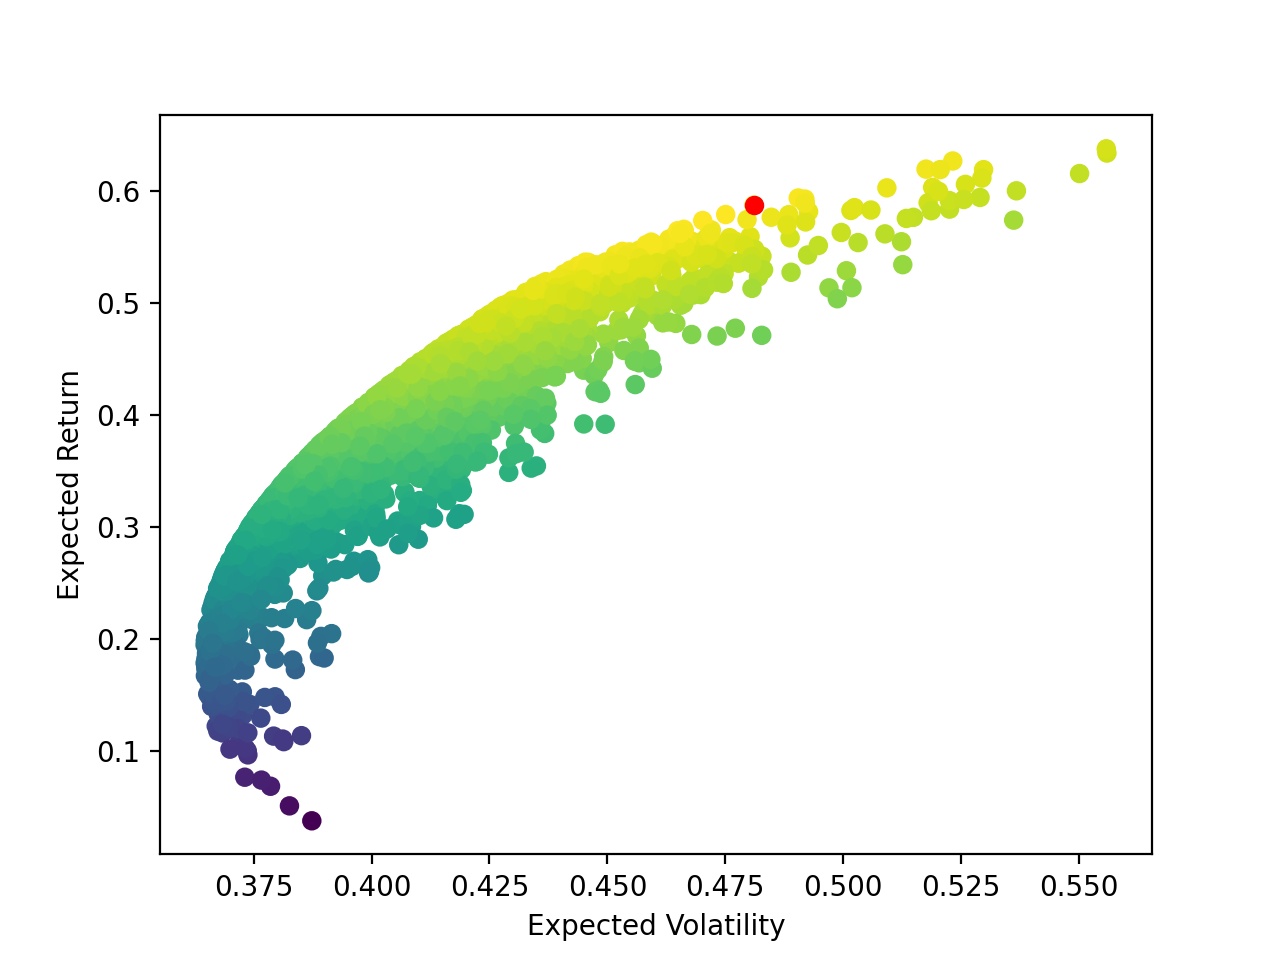

Text(0, 0.5, 'Expected Return')

In [56]:
fig, ax = plt.subplots()
ax.scatter(exp_vols, exp_rtns, c=sharpe_ratios)
ax.scatter(exp_vols[sharpe_ratios.argmax()], exp_rtns[sharpe_ratios.argmax()], c='r')
ax.set_xlabel('Expected Volatility')
ax.set_ylabel('Expected Return')